### Sckit-learn 으로 분류(Classfication)

In [7]:
import warnings
import numpy as np
import pandas as pd

# 불필요한 경고 출력을 방지한다.
warnings.filterwarnings('ignore')

In [8]:
# iris 데이터셋
from sklearn.datasets import load_iris

In [9]:
# 데이터셋 로드
iris = load_iris()

In [10]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
data = iris['data']

In [13]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
# 지도학습 : 분류
target = iris['target']
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [19]:
# 데이터프레임에 데이터셋 넣기
df_iris = pd.DataFrame(data, columns=iris.feature_names)

In [20]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df_iris['target']=target

In [22]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

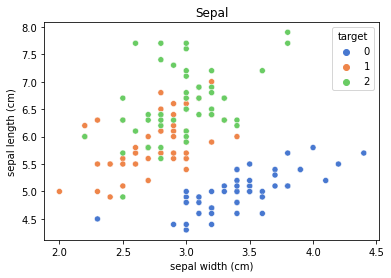

In [35]:
# scatterplot : 산점도 그래프scatterplot : 산점도 그래프
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Sepal')
plt.show()

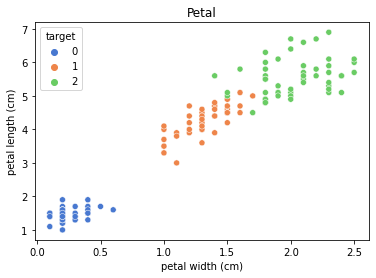

In [36]:
# scatterplot : 산점도 그래프scatterplot : 산점도 그래프
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

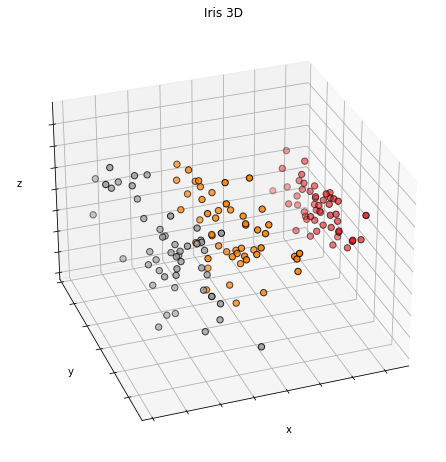

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [38]:
# 학습할 데이터와 테스트 데이터를 나눈다
from sklearn.model_selection import train_test_split

In [46]:
df_iris.drop('target', 1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [69]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], test_size=0.2)

In [70]:
x_train.shape, x_valid.shape

((120, 4), (30, 4))

In [71]:
y_train.shape, y_valid.shape

((120,), (30,))

<AxesSubplot:xlabel='target', ylabel='count'>

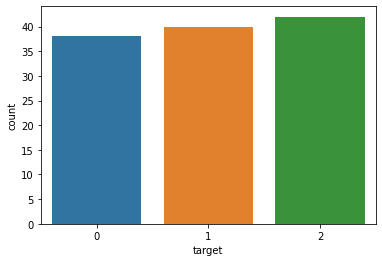

In [72]:
# 0, 1, 2 class 데이터 불균형이 있는지 확인할 필요가 있다.
sns.countplot(y_train)

In [60]:
# 클래스별 데이터의 분포를 균등하게 배분
# stratify : 정한 Data의 비율을 유지한다.
x_train, x_vaild, y_train, y_vaild = train_test_split(df_iris.drop('target', 1), df_iris['target'], test_size=0.2, stratify=df_iris['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

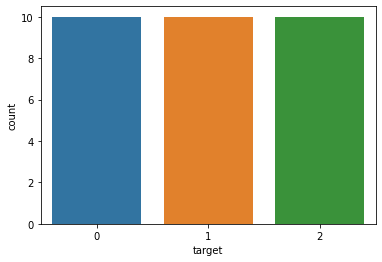

In [59]:
sns.countplot(y_vaild)

#### Logistic Regression
독립변수의 선형 결함을 사용하여 사건의 발생 가능성을 예측한다 (pdf 참조)

In [63]:
from sklearn.linear_model import LogisticRegression

In [65]:
# 1. 모델 선언
model = LogisticRegression()

In [66]:
# 2. 모델 학습
model.fit(x_train, y_train)

LogisticRegression()

In [73]:
# 3. 학습이 잘 되었는지 확인
prediction = model.predict(x_valid)

In [74]:
prediction

array([1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 1, 2, 0])

In [75]:
# Logistic Regression Model은 96%의 정확도를 갖는다.
(prediction==y_valid).mean()    # 평균값

0.9666666666666667

#### SGDClassifier (Stochastic Gradient Descent) : 확률적 경사하강법

Deterministic vs Stochastic

In [76]:
from sklearn.linear_model import SGDClassifier

In [90]:
# 1. 모델 선언
# random_state => random_seed
sgd = SGDClassifier(random_state=110)

In [91]:
# 2. 모델 학습
sgd.fit(x_train, y_train)

SGDClassifier(random_state=110)

In [92]:
# 3. 학습 결과 확인(테스트)
prediction = sgd.predict(x_valid)

In [93]:
(prediction==y_valid).mean()

0.8666666666666667

In [ ]:
# 하이퍼파리미터 튜닝
# random_state : 하이퍼파리미터 튜닝시 고정
# n_jobs = -1 : CPU CORE를 모두 사용 (학습속도가 빨라진다)
# GPU가 아닌 CPU로 처리

In [96]:
# overfitting(과적합)을 방지하기 위해 L1(Lasso Regulization)을 적용시킨다.
sgd = SGDClassifier(penalty='l1', random_state=119, n_jobs=-1)

In [98]:
sgd.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=119)

In [99]:
prediction = sgd.predict(x_valid)

In [100]:
(prediction==y_valid).mean()

0.9333333333333333

#### KNN(K-Neighbors) Classifier

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 1. 모델 정의
# default k = 5
model = KNeighborsClassifier

In [105]:
# 2. 모델 학습
model.fit(x_train, y_train)

LogisticRegression()

In [106]:
# 3. 모델 테스트
prediction = model.predict(x_valid)

In [108]:
(prediction==y_valid).mean()

0.9666666666666667

k = 11 이면

In [131]:
# iris 데이터셋의 경우 n_neighbors값이 높을 수록 정확한 편이다
model = KNeighborsClassifier(n_neighbors=11)
model.fit(x_train, y_train)
prediction = model.predict(x_valid)
(prediction==y_valid).mean()

0.9666666666666667

#### 서포트 벡터 머신 (SVC)
새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듬.
경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘

![image.png](attachment:image.png)Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

In [136]:
from sklearn.svm import SVC

In [137]:
model = SVC(random_state=123)

In [138]:
model.fit(x_train, y_train)

SVC(random_state=123)

In [139]:
prediction = model.predict(x_valid)

In [140]:
(prediction==y_valid).mean()

0.9666666666666667

#### 의사 결정 트리(Decision Tree)
스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것

![image.png](attachment:image.png)Image('https://www.researchgate.net/profile/Ludmila_Aleksejeva/publication/293194222/figure/fig1/AS:669028842487827@1536520314657/Decision-tree-for-Iris-dataset.png', width=500)

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [150]:
model = DecisionTreeClassifier(random_state=0)

In [151]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [153]:
prediction = model.predict(x_valid)

In [155]:
(prediction==y_valid).mean()

0.9666666666666667

In [159]:
#!pip install graphviz

[Text(334.8, 587.0880000000001, 'X[3] <= 0.75\ngini = 0.666\nsamples = 120\nvalue = [38, 40, 42]'),
 Text(283.2923076923077, 456.624, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(386.3076923076923, 456.624, 'X[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 40, 42]'),
 Text(206.03076923076924, 326.1600000000001, 'X[2] <= 4.95\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]'),
 Text(103.01538461538462, 195.69600000000003, 'X[3] <= 1.65\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(51.50769230769231, 65.23200000000008, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(154.52307692307693, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(309.04615384615386, 195.69600000000003, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(257.53846153846155, 65.23200000000008, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(360.55384615384617, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(566.58461538461

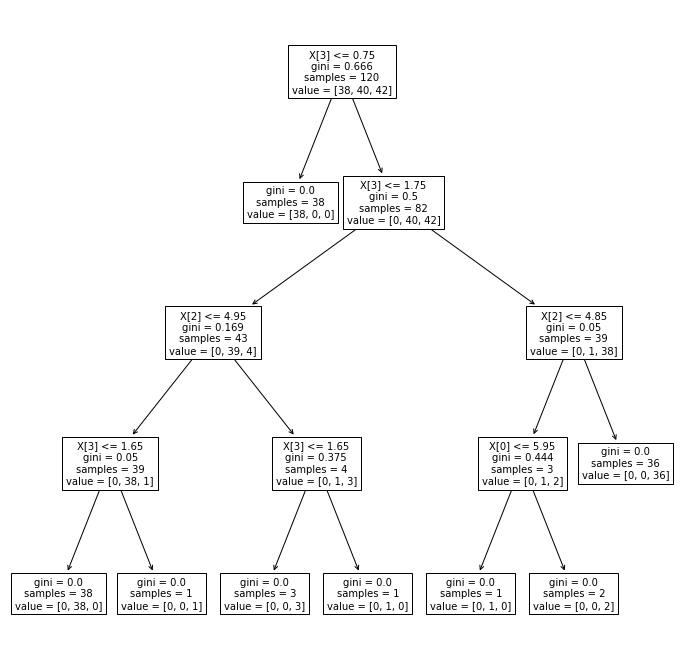

In [164]:
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=10)